In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
from pathlib import Path
from scipy.signal import argrelmax

def plt_style_dark():
    plt.style.use('dark_background')

    plt.rc('font', size=12)
    plt.rcParams["font.family"] = "DejaVu Serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]
    plt.rcParams["mathtext.fontset"] = "cm"

def plt_style_def():
    plt.style.use('default')

    plt.rc('font', size=12)
    plt.rcParams["font.family"] = "DejaVu Serif"
    plt.rcParams["font.serif"] = ["Times New Roman"]
    plt.rcParams["mathtext.fontset"] = "cm"

plt_style_def()

In [4]:
log = np.load('./diagnostics/f_xi_00000.00.npz')

In [7]:
arg = argrelmax(log['Ez'])[0]

xi_max = log['xi'][arg]
Ez_max = log['Ez'][arg]

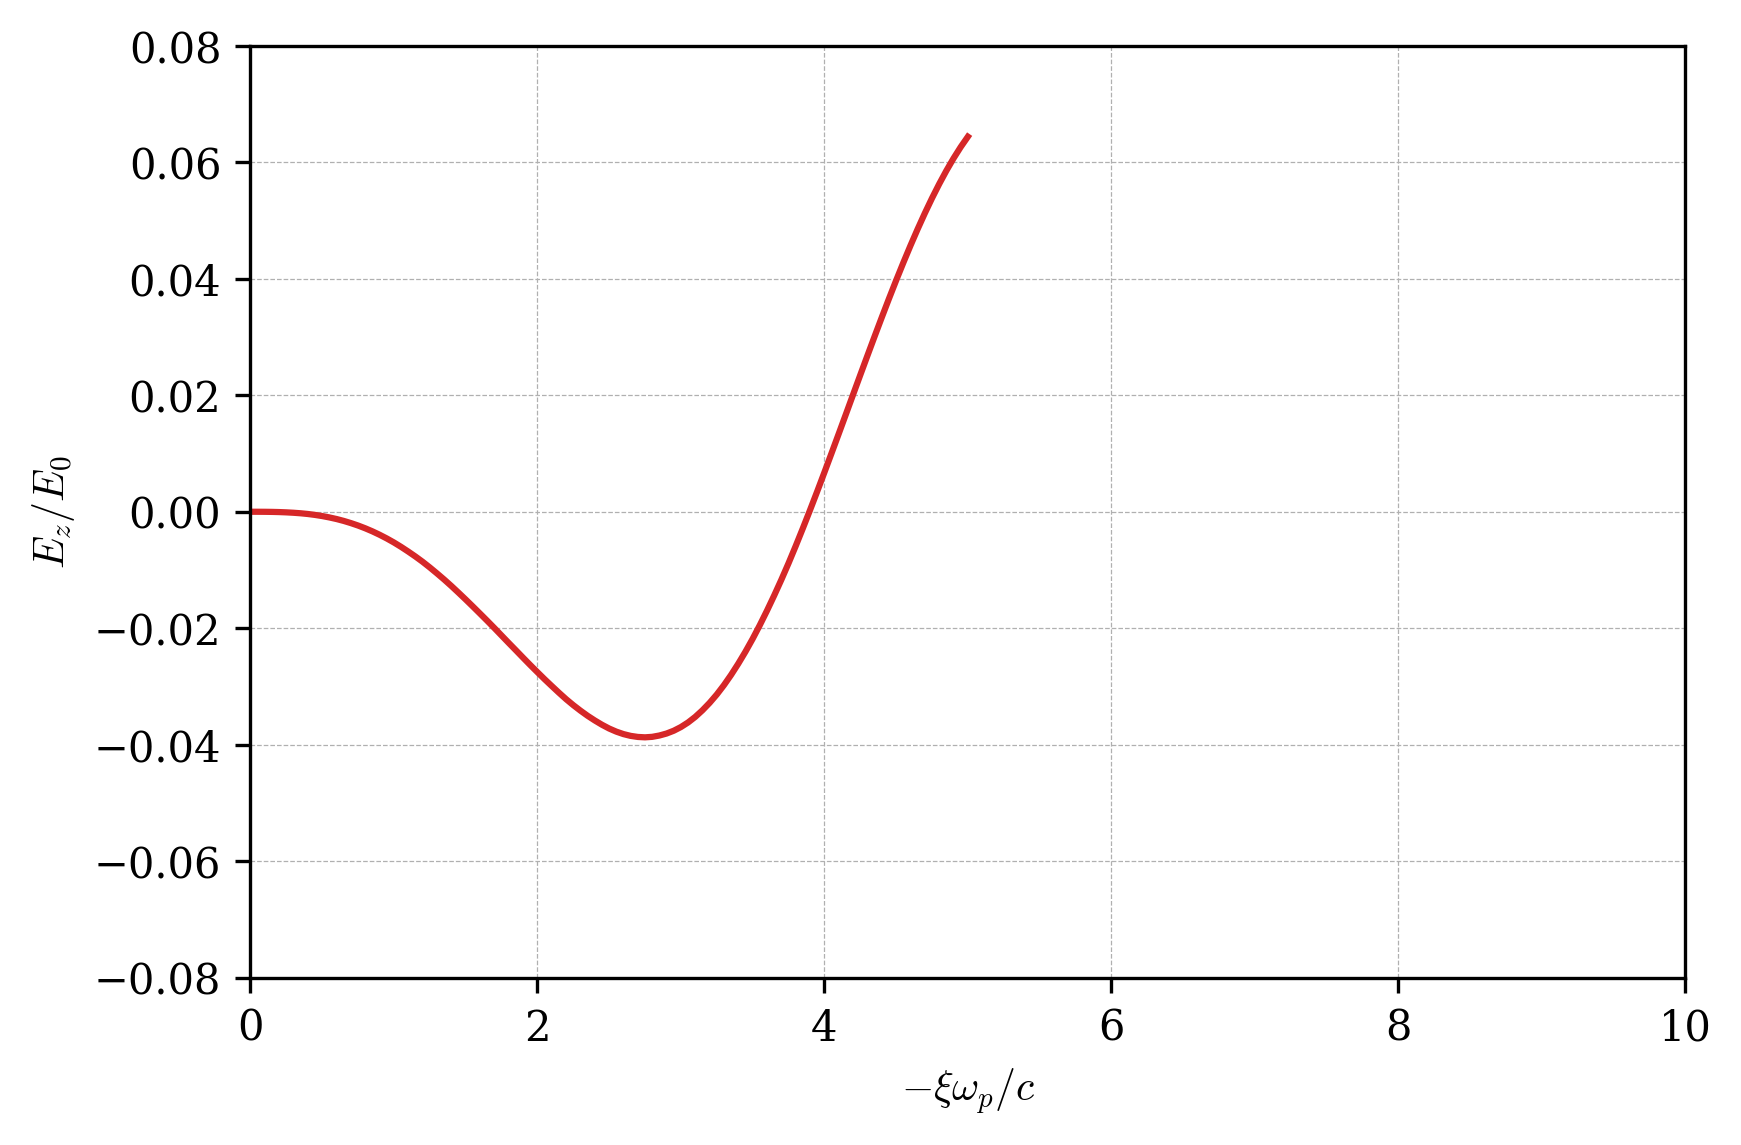

In [13]:
# plt.figure(figsize=(19.2/2, 8/2), dpi=700)
cm = 1/2.54
plt.figure(figsize=(15.675*cm, 15.675*2/3*cm), dpi=300)
plt.xlim(0, 10)
plt.ylim(-0.08, 0.08)

# plt.rcParams['axes.axisbelow'] = True
plt.grid(which='both', linestyle='--', linewidth=.3)

plt.plot(-xi_max, Ez_max, lw=1.5, color='tab:red')
plt.plot(-log['xi'], log['Ez'], lw=1.5, color='tab:red')

plt.ylabel(r'$E_{z}/E_{0}$')
plt.xlabel(r'$-\xi\omega_{p}/c$')

# plt.plot([0, 3000], [0.07532376924, 0.07532376924], lw=1.5, color='tab:pink', label='Theory')
# font = font_manager.FontProperties(family='Times New Roman') #, size=10)

# plt.legend(prop = font, fontsize=10, loc=2) #, font='TimesNewRoman')
# plt.legend(fontsize=10, loc=1)

plt.savefig('wave_amplitude.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [9]:
cmap_Ez = np.load('./diagnostics/colormaps_00000.00.npz')['Ez']
cmap_rho = np.load('./diagnostics/colormaps_00000.00.npz')['rho']

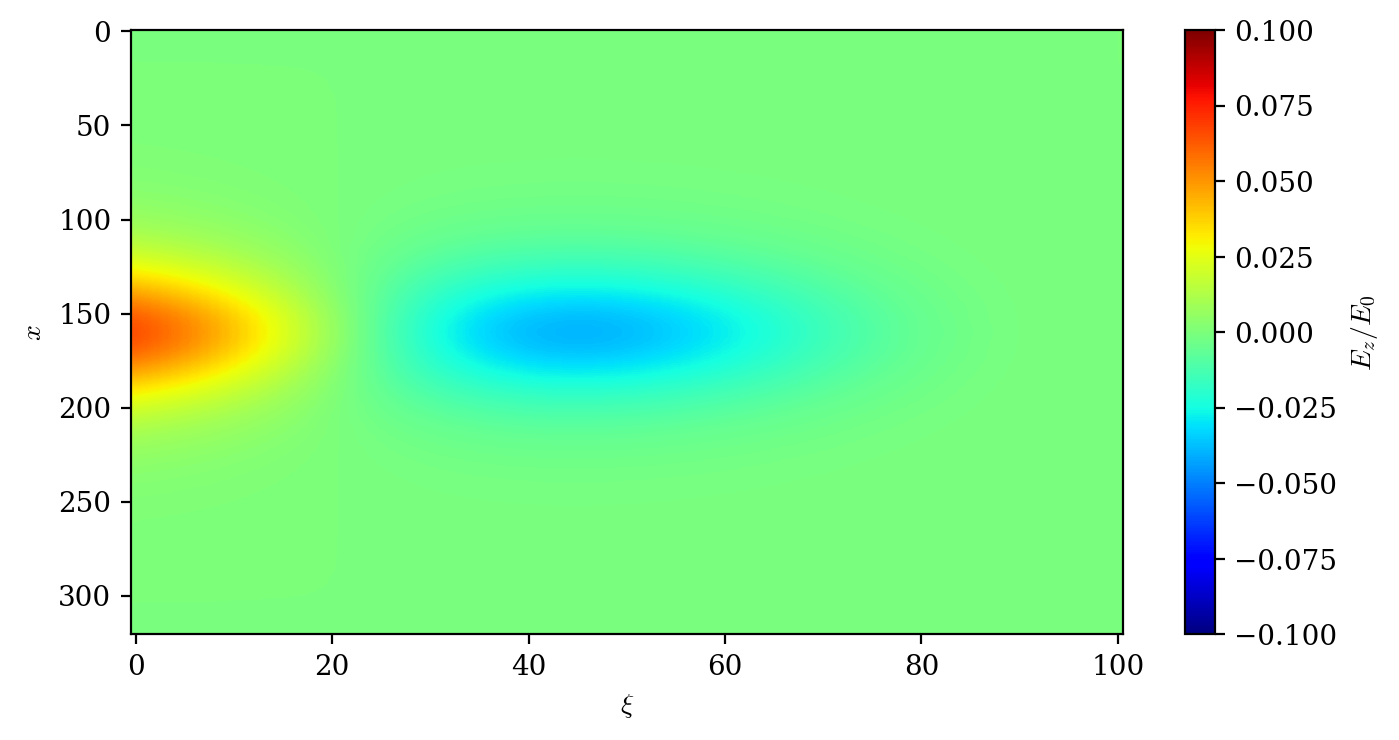

In [13]:
fig = plt.figure(figsize=(8, 4), dpi=200)
cmap = (cmap_Ez[::-1].T)
plt.imshow(cmap, cmap='jet', vmin=-0.1, vmax=0.1, aspect='auto')

plt.xlabel(r'$\xi$') #\omega_{p}/c$')
plt.ylabel(r'$x$') # \omega_{p}/c$')

plt.colorbar(label='$E_z/E_0$', orientation="vertical")

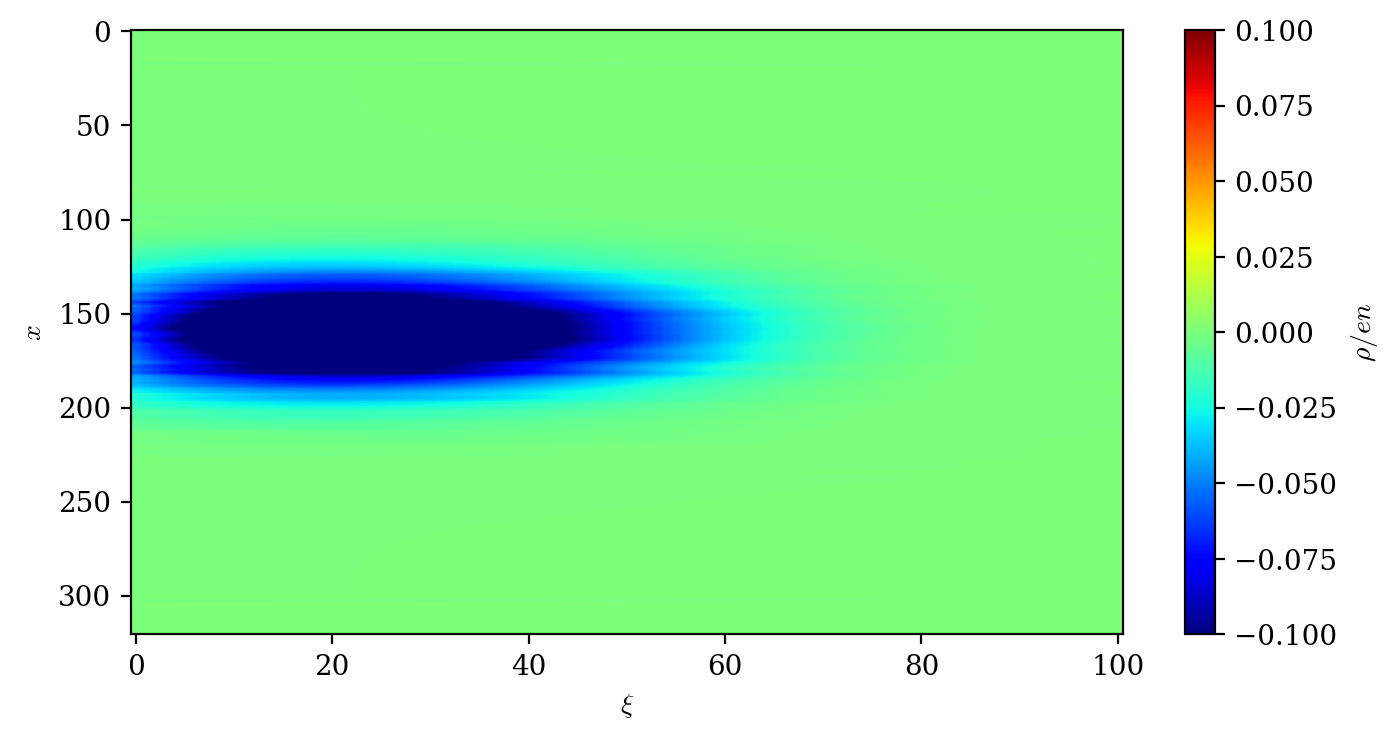

In [14]:
fig = plt.figure(figsize=(8, 4), dpi=200)
cmap = (cmap_rho[::-1].T)
plt.imshow(cmap, cmap='jet', vmin=-0.1, vmax=0.1, aspect='auto')

plt.xlabel(r'$\xi$') #\omega_{p}/c$')
plt.ylabel(r'$x$') # \omega_{p}/c$')

plt.colorbar(label='$\\rho / e n$', orientation="vertical")